In [1]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random

In [2]:
learning_rate=0.01 #important parameter needs to be played a lot
training_epochs = 1000
display_step = 50

In [3]:
train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

In [4]:
X = tf.placeholder("float")
Y = tf.placeholder("float")
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

In [5]:
pred = tf.add(tf.multiply(X, W), b) #y=mx+b

In [8]:
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
init = tf.global_variables_initializer()

Epoch: 0050 cost= 0.087544382 W= 0.307198 b= 0.387068
Epoch: 0100 cost= 0.086321585 W= 0.303771 b= 0.411714
Epoch: 0150 cost= 0.085240155 W= 0.30055 b= 0.434894
Epoch: 0200 cost= 0.084283814 W= 0.297519 b= 0.456696
Epoch: 0250 cost= 0.083438091 W= 0.294668 b= 0.477202
Epoch: 0300 cost= 0.082690224 W= 0.291988 b= 0.496487
Epoch: 0350 cost= 0.082028933 W= 0.289466 b= 0.514625
Epoch: 0400 cost= 0.081444167 W= 0.287095 b= 0.531684
Epoch: 0450 cost= 0.080927037 W= 0.284865 b= 0.54773
Epoch: 0500 cost= 0.080469780 W= 0.282767 b= 0.562822
Epoch: 0550 cost= 0.080065466 W= 0.280794 b= 0.577016
Epoch: 0600 cost= 0.079707973 W= 0.278938 b= 0.590366
Epoch: 0650 cost= 0.079391889 W= 0.277192 b= 0.602923
Epoch: 0700 cost= 0.079112463 W= 0.275551 b= 0.614732
Epoch: 0750 cost= 0.078865454 W= 0.274007 b= 0.625836
Epoch: 0800 cost= 0.078647062 W= 0.272555 b= 0.636281
Epoch: 0850 cost= 0.078454010 W= 0.27119 b= 0.646104
Epoch: 0900 cost= 0.078283325 W= 0.269906 b= 0.655344
Epoch: 0950 cost= 0.078132451 W

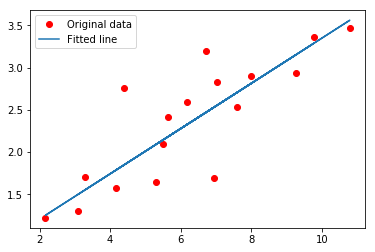

In [9]:
with tf.Session() as sess:

    # Run the initializer
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        # Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))

    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    # Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()